<h1> 2. Exploratory Data Analysis</h1>

<p><b>2.0</b> Reading the data from the csv file and importing some necessary packages. </p>

In [40]:
import pandas as pd
import os
india_data = pd.read_csv("reddit-india-data.csv")

<p><b>2.1</b> Understanding the dataset overall in terms of the size and data columns while veryfying if there are any null values. <br>
If null values exist that are relevant to the classification, then there would be a need for a function to remove these or add values depending on the dataset as null values adversely affect the performance and accuracy of any machine learning algorithm. 
<br><br>
We also store a list of all the unique flair values into flairs. [Note: While collecting the data, even on multiple attempts are trying different methods, the flair 'Science/Technology' interrupted the code every time. I had to go with excluding that particular flair out of my dataset.]</p>

In [41]:
print("\nInfo: \n")
india_data.info()

print("\nFlairs present in the dataset: \n")
flairs = india_data.flair.unique()
print(flairs)


Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flair         2000 non-null   object
 1   title         2000 non-null   object
 2   url           2000 non-null   object
 3   body          1098 non-null   object
 4   num_comments  2000 non-null   int64 
 5   comments      1804 non-null   object
 6   score         2000 non-null   int64 
 7   id            2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB

Flairs present in the dataset: 

['Non-Political' 'Scheduled' 'Photography' 'Politics' 'Business/Finance'
 'Policy/Economy' 'Sports' 'Food' 'AskIndia' 'Coronavirus']


<p><b>2.2</b> Printing first ten and last ten values to acquire an understanding of what values the data columns actually represent. </p>

In [42]:
india_data.head(10)

,flair,title,url,body,num_comments,comments,score,id
0,Non-Political,Indian States / UTs if renamed for countries w...,https://i.redd.it/hk9o11b8dun41.png,NaN,20,nice name for Uttar Pradesh. Ajay Bisht is go...,185,flwd7r
1,Non-Political,Hotstar finally uploads Sunday’s “Last Week To...,https://www.hotstar.com/in/tv/last-week-tonigh...,NaN,12,First turning off the internet of an entire s...,162,fgb1k3
2,Non-Political,Best non-political stand up comedian?,https://www.reddit.com/r/india/comments/g3zbrt...,Any thing related to politics gives me anxiety...,9,Abhishek Upmanyu\n\n\nKenny Sebastian\n\n\nBi...,2,g3zbrt
3,Non-Political,ICSE and ISC exams have been postponed due to ...,https://cisce.org//UploadedFiles/PDF/COVID%201...,NaN,0,NaN,7,fl4viz
4,Non-Political,"[Non-Political]Friend wrote his first book, th...",https://www.reddit.com/r/india/comments/ezqw6i...,"A friend of mine wrote his first book ""Music M...",0,NaN,13,ezqw6i
5,Non-Political,[Non-Political] Wild Karnataka - David Attenbo...,https://youtu.be/gHSVLd4Ao60,NaN,1,Is this real? Did David Attenborough voice a ...,23,ejetgt
6,Non-Political,[Non-Political] Today the Zoroastrian communit...,https://imgur.com/XY4daDc,NaN,17,Happy Navroz to all dikras and dikris Wow and...,367,crifi9
7,Non-Political,[Non-Political] This newspaper is 50 year old ...,https://imgur.com/lfOyub8,NaN,13,"""Bankon ka rashtiyakaran janata ke hit mein"" ...",116,cfeur8
8,Non-Political,"Prime Time With Ravish Kumar, April 24, 2019 |...",https://www.youtube.com/watch?v=vCmZlob-PIo,NaN,73,"""Modi ji... kuch fakeeri si hai aapme"" *Arnab...",439,bh4wzu
9,Non-Political,"[Non-Political] Dear Bangalore, I see your gra...",http://i.imgur.com/CZoN8aX.jpg,NaN,12,Nobody :\n\nRandom graffiti artist : I'm a ph...,106,bx5zig


In [9]:
india_data.tail(10)

,flair,title,url,body,num_comments,comments,score,id
1990,Coronavirus,Know any Corona Asana? Govt will fund you,https://www.reddit.com/r/india/comments/g1cn1w...,https://www.telegraphindia.com/india/know-any-...,6,Stop breathing aasana We can try some stupid ...,33,g1cn1w
1991,Coronavirus,"Aggressive testing, contact tracing, cooked me...",https://www.washingtonpost.com/world/aggressiv...,NaN,8,Most developed state of India,77,fz0gfa
1992,Coronavirus,"Modi had trapped himself in a corner, then cor...",https://theprint.in/opinion/modi-had-trapped-h...,NaN,35,This is absolutely crazy. I'm no fan of this ...,193,fyvv58
1993,Coronavirus,Coronavirus crisis: Akshay Kumar donates Rs 3 ...,https://www.indiatoday.in/movies/celebrities/s...,NaN,51,Most generous foreigner. Thank you Rajiv. To ...,325,fyv1jv
1994,Coronavirus,Covid-19: How can we help?,https://www.reddit.com/r/india/comments/g19u70...,A lot of us are not in a position to physicall...,3,Harsh Mander's Karwaan e Mohabbat is doing ve...,22,g19u70
1995,Coronavirus,Coronavirus update: Maharashtra lockdown till ...,https://www.hindustantimes.com/india-news/maha...,NaN,0,NaN,28,fz4ibx
1996,Coronavirus,India's lockdown had near 0 effect on the spre...,https://www.reddit.com/r/india/comments/fzs4jb...,See the total cases on log scale here:\nhttps:...,12,I don't think anyone would have supported a n...,0,fzs4jb
1997,Coronavirus,"17 Ludhiana cops, Judge quarantined as arreste...",https://www.news18.com/news/india/17-ludhiana-...,NaN,3,Nope still not community transmission,47,fz2it1
1998,Coronavirus,"Coronavirus Outbreak: A database of books, per...",https://www.firstpost.com/long-reads/coronavir...,NaN,0,NaN,3,fzo3k4
1999,Coronavirus,Covid-19: Kamal Nath says lockdown was delayed...,https://scroll.in/latest/958962/covid-19-kamal...,NaN,38,*I has biggest IQ in the whole MP* - Probably...,439,g0bfmo


<p> Observation from 2.1, 2.2 and 2.3: The body column has a great number of null values. </p>

<p><b>2.3</b> Using matplotlib here, we are plotting the 'flair' against the 'number of occurrences' of the flair in our dataset to see if there is variation in how much data is present for each flair. In this case, while collecting data, it was ensured that an equal amount of data for each flair was collected and the dataset is hence, very balanced. </p> 

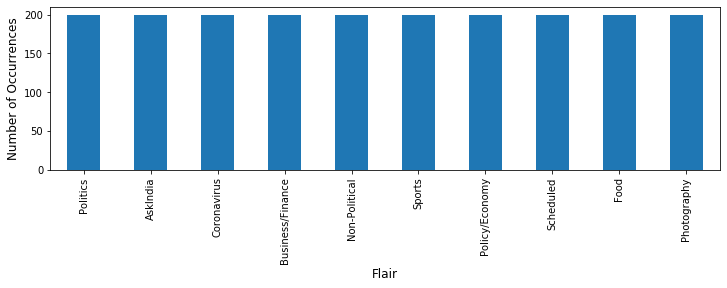

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flair', fontsize=12)
india_data.flair.value_counts().plot(kind='bar')

<p><b> 2.4 </b> A plot for the number of comments for each flair. This could later determine the results of this number on the classifier. </p>

Text(0.5, 1.0, 'Number of Comments for each Flair')

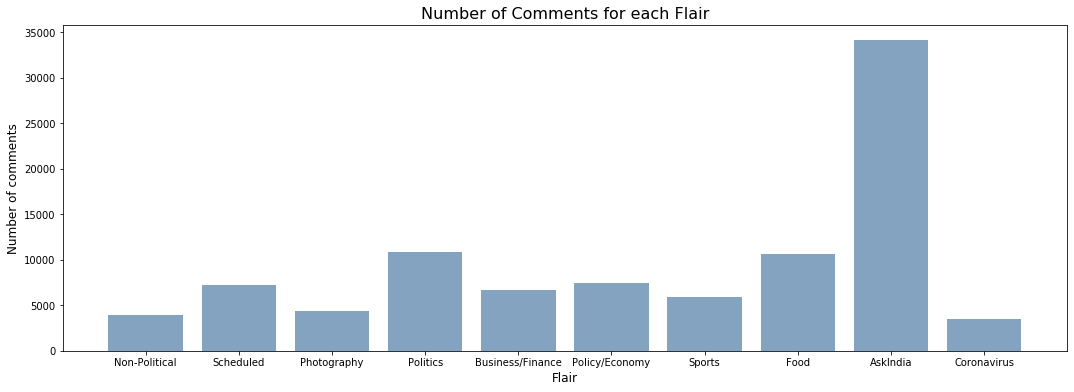

In [44]:
flairs = ['Non-Political', 'Scheduled', 'Photography', 'Politics', 'Business/Finance',
 'Policy/Economy', 'Sports', 'Food', 'AskIndia', 'Coronavirus']
flair_comment_count = []
for flair in flairs:
    flair_comment_count.append(india_data.loc[india_data['flair'] == flair, 'num_comments'].sum(skipna = True))
plt.figure(figsize=(18,6))
plt.bar(flairs,flair_comment_count,color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Flair', fontsize=12)
plt.ylabel('Number of comments', fontsize=12)
plt.title('Number of Comments for each Flair', fontsize = 16)

<p><b>2.5 </b> Plotting length of: a) title, b) title + comments, c) title + comments + body, and d) title + comments + body + url <br>  
against the unique flair values. This will be useful in comparing size of the x value with the y value which is the flair, and hence help us draw conclusions about the relation between the length of the x value and the flair prediction accuracy. </p> 

<p><b>2.5.1</b> Preprocessing and cleaning step where we define a function to remove stopwords and remove symbols or replace by space.

In [45]:
import re
import nltk
from nltk.corpus import stopwords

replace_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = stopwords.words('english')

def clean_data(text):
    #converting to lowercase
    text = text.lower()
    #re.sub(new_value, text_to_processed) 
    text = replace_by_space.sub(' ', text)
    text = bad_symbols.sub('', text)
    #removing the stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text

In [46]:
india_data['title'] = india_data['title'].apply(clean_data)
india_data['comments'] = india_data['comments'].astype('str').apply(clean_data)
india_data['body'] = india_data['body'].astype('str').apply(clean_data)

In [47]:
def clean_url(u):
    if u.startswith("http://"):
        u = u[7:]
    if u.startswith("https://"):
        u = u[8:]
    if u.startswith("www."):
        u = u[4:]
    if u.endswith("/"):
        u = u[:-1]
    return u

In [48]:
india_data['url'] = india_data['url'].apply(clean_url)
india_data['url'] = india_data['url'].apply(clean_data)

Non-Political
Scheduled
Photography
Politics
Business/Finance
Policy/Economy
Sports
Food
AskIndia
Coronavirus
[12237, 12717, 10639, 15074, 10877, 12257, 12093, 13823, 10854, 14956]


Text(0.5, 1.0, 'Plotting total length of Titles with flair')

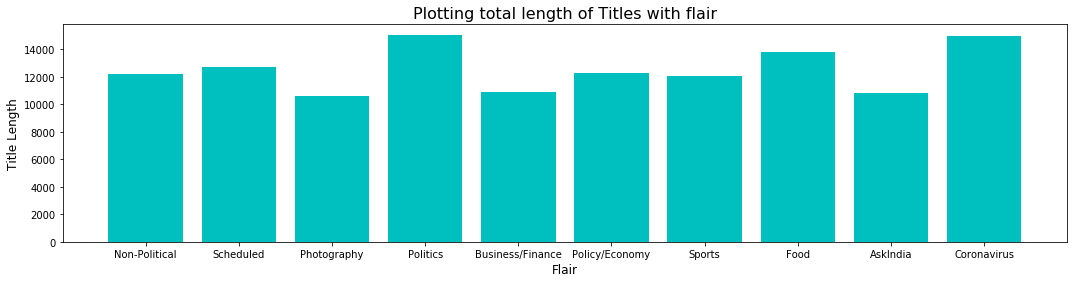

In [49]:
title_len = ""
flair_title_len = []
for flair in flairs:
    print(flair)
    title_len = (india_data.loc[india_data['flair'] == flair, 'title'].sum())
    flair_title_len.append(len(title_len))
print(flair_title_len)

plt.figure(figsize=(18,4))
plt.bar(flairs,flair_title_len,color='c')
plt.xlabel('Flair', fontsize=12)
plt.ylabel('Title Length', fontsize=12)
plt.title('Plotting total length of Titles with flair', fontsize = 16)

Non-Political
Scheduled
Photography
Politics
Business/Finance
Policy/Economy
Sports
Food
AskIndia
Coronavirus
[149577, 287634, 177338, 402921, 427274, 523924, 314195, 286705, 1496682, 125819]


Text(0.5, 1.0, 'Plotting total length of Comments with Flair')

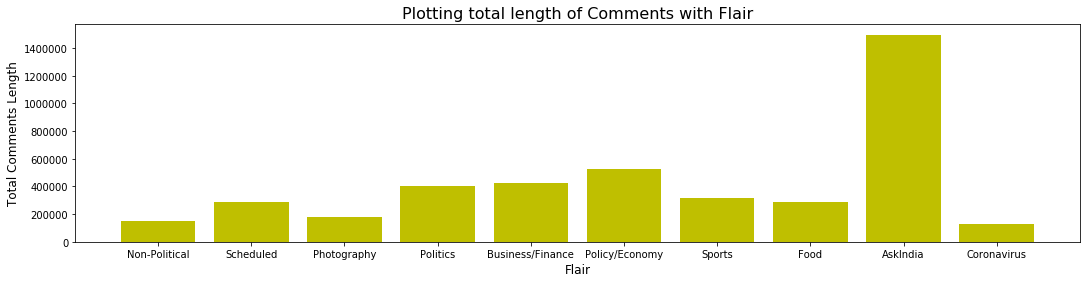

In [50]:
comment_len = ""
flair_comment_len = []
for flair in flairs:
    print(flair)
    comment_len = (india_data.loc[india_data['flair'] == flair, 'comments'].sum(skipna = True))
    flair_comment_len.append(len(comment_len))
print(flair_comment_len)

plt.figure(figsize=(18,4))
plt.bar(flairs,flair_comment_len,color='y')

plt.xlabel('Flair', fontsize=12)
plt.ylabel('Total Comments Length', fontsize=12)
plt.title('Plotting total length of Comments with Flair', fontsize = 16)

Non-Political
Scheduled
Photography
Politics
Business/Finance
Policy/Economy
Sports
Food
AskIndia
Coronavirus
[66225, 145111, 82609, 78029, 617554, 450820, 114575, 37307, 135252, 49557]


Text(0.5, 1.0, 'Plotting total length of Body with Flair')

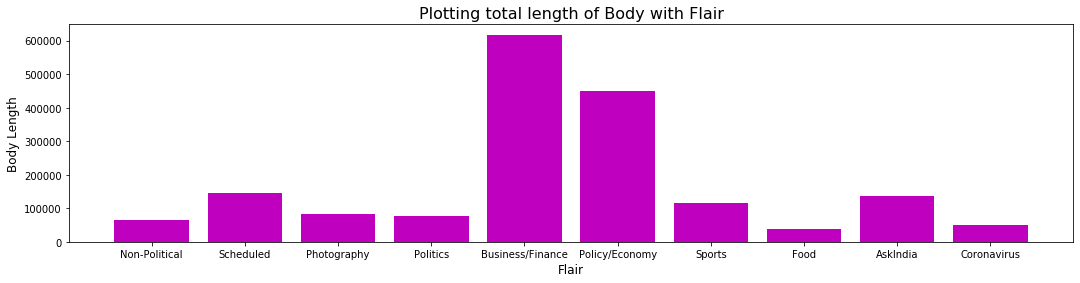

In [51]:
body_len = ""
flair_body_len = []
for flair in flairs:
    print(flair)
    body_len = (india_data.loc[india_data['flair'] == flair, 'body'].sum(skipna = True))
    flair_body_len.append(len(body_len))
print(flair_body_len)

plt.figure(figsize=(18,4))
plt.bar(flairs,flair_body_len,color='m')
plt.xlabel('Flair', fontsize=12)
plt.ylabel('Body Length', fontsize=12)
plt.title('Plotting total length of Body with Flair', fontsize = 16)

Non-Political
Scheduled
Photography
Politics
Business/Finance
Policy/Economy
Sports
Food
AskIndia
Coronavirus
[12503, 15388, 12597, 15704, 16295, 16169, 15361, 16637, 15500, 19099]


Text(0.5, 1.0, 'Plotting total length of URL with Flair')

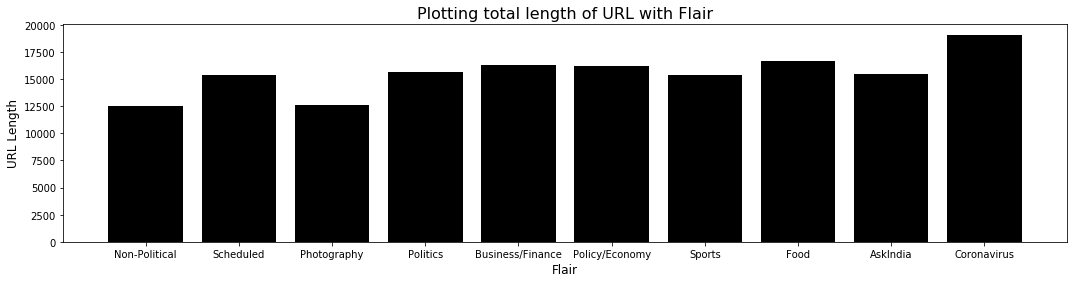

In [52]:
url_len = ""
flair_url_len = []
for flair in flairs:
    print(flair)
    url_len = (india_data.loc[india_data['flair'] == flair, 'url'].sum(skipna = True))
    flair_url_len.append(len(url_len))
print(flair_url_len)

plt.figure(figsize=(18,4))
plt.bar(flairs,flair_url_len,color='k')
plt.xlabel('Flair', fontsize=12)
plt.ylabel('URL Length', fontsize=12)
plt.title('Plotting total length of URL with Flair', fontsize = 16)

<p><b>2.6 </b>Finding the most used words for each flair would be another important factor to know for the flair detector. </p>

In [53]:
for flair in flairs: 
    print( pd.Series(' '.join(india_data.loc[india_data['flair'] == flair, 'title']).split()).value_counts()[:5] )

nonpolitical    148
political        59
non              53
india            36
indian           15
dtype: int64
scheduled    75
thread       38
india        29
schedule     24
caste        13
dtype: int64
photography    130
thread          69
india           38
weekly          35
2019            24
dtype: int64
political    67
politics     62
india        30
delhi        21
bjp          15
dtype: int64
week       54
indian     41
india      32
last       30
finance    26
dtype: int64
india      59
economy    44
modi       22
indias     21
indian     20
dtype: int64
sports    80
india     44
indian    23
sport     19
like      11
dtype: int64
food           165
lockdown        38
india           20
coronavirus     17
delivery        17
dtype: int64
askindia    146
india        38
indian       16
help         14
need         13
dtype: int64
coronavirus    177
india           61
lockdown        33
covid19         27
cases           18
dtype: int64


In [54]:
for flair in flairs: 
    print(pd.Series(' '.join(india_data.loc[india_data['flair'] == flair, 'comments']).split()).value_counts()[:5])

dont      138
like      132
people    125
india     125
one       102
dtype: int64
people    303
like      261
get       227
one       222
caste     220
dtype: int64
https    210
get      169
good     169
like     152
dont     150
dtype: int64
people    515
like      358
bjp       330
https     328
dont      290
dtype: int64
india     336
get       294
like      294
good      283
people    268
dtype: int64
india         595
people        474
like          415
economy       376
government    362
dtype: int64
like      327
india     314
people    307
dont      265
sports    260
dtype: int64
people    520
food      387
like      285
dont      279
get       181
dtype: int64
https     1966
people    1960
india     1233
cases     1216
status    1171
dtype: int64
https       153
cases       146
people      143
lockdown    115
india       114
dtype: int64


In [55]:
for flair in flairs: 
    print(pd.Series(' '.join(india_data.loc[india_data['flair'] == flair, 'url']).split()).value_counts()[:5])

india        113
comments     111
r            111
redditcom    111
iimgurcom     18
dtype: int64
india        145
r            131
comments     131
redditcom    131
article       16
dtype: int64
india        125
redditcom    123
r            123
comments     123
ireddit       19
dtype: int64
india        89
comments     68
r            68
redditcom    68
status       21
dtype: int64
india                                              157
comments                                           156
redditcom                                          156
r                                                  156
last_week_in_indian_economy_for_the_week_ending     21
dtype: int64
india        136
comments     130
r            130
redditcom    130
opinion       15
dtype: int64
india        120
comments     114
r            114
redditcom    114
ireddit       14
dtype: int64
india        83
redditcom    62
r            62
comments     62
news         27
dtype: int64
india        198
comments     198
r 